<Body>   
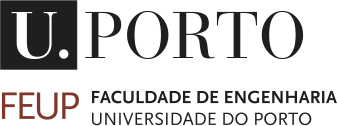 
</Body> 
<br>   
<br>   
<br>   

# **Mini projects on machine learning and control systems**

### 2025/2026      

<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt)

**José Pedro Carvalho** (jose.carvalho@fe.up.pt)

FEUP, Oct. 2025

---


# 1- What is Colaboratory? 
(*This section is a partially copy of the "Colab getting started" file.*)





Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing


The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut **"Command/Ctrl+Enter"**. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

# 2 - Resources

*In this course you don't need to know much more than what is presented here, but if you are interested, here goes a list of references where you can find more information about jupyter notebooks and Python.*

* Jupyter notebook:
https://jupyter.org

* The Markdown Guide: https://www.markdownguide.org

* Introduction to Python (a collection of notebooks):
https://nbviewer.jupyter.org/github/ehmatthes/intro_programming/blob/master/notebooks/contents.ipynb

* A Crash Course in Python for Scientists:
https://nbviewer.jupyter.org/gist/rpmuller/5920182

* Scientific Computing with Python:
https://nbviewer.jupyter.org/url/atwallab.cshl.edu/teaching/QBbootcamp3.ipynb

* For users who are more familiar with Matlab, check here a comparison of NumPy and analog functions in Matlab:
https://numpy.org/devdocs/user/numpy-for-matlab-users.html


# 3 - Useful libraries: a quickstart

*You can skip this section, this is just for who may be interested about Python*.

Some interesting and useful Python libraries:


__Numpy__

NumPy is the fundamental package for scientific computing with Python.
<br> NumPy user guide: https://numpy.org/doc/stable/user/index.html

__Scipy__

The SciPy library is a collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.
<br> Scipy user guide: https://scipy.github.io/devdocs/tutorial/index.html#user-guide

__Matplotlib__

Matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
<br> Matplotlib user guide: https://matplotlib.org/stable/contents.html

__Sympy__

SymPy is a Python library for symbolic mathematics.
<br> SymPy tutorial: https://docs.sympy.org/latest/tutorial/index.html#tutorial




# 4 - Control Systems

*This section is important. You will learn how one can design a Lyapunov based controller*.



## What is a control system?


<Body>   
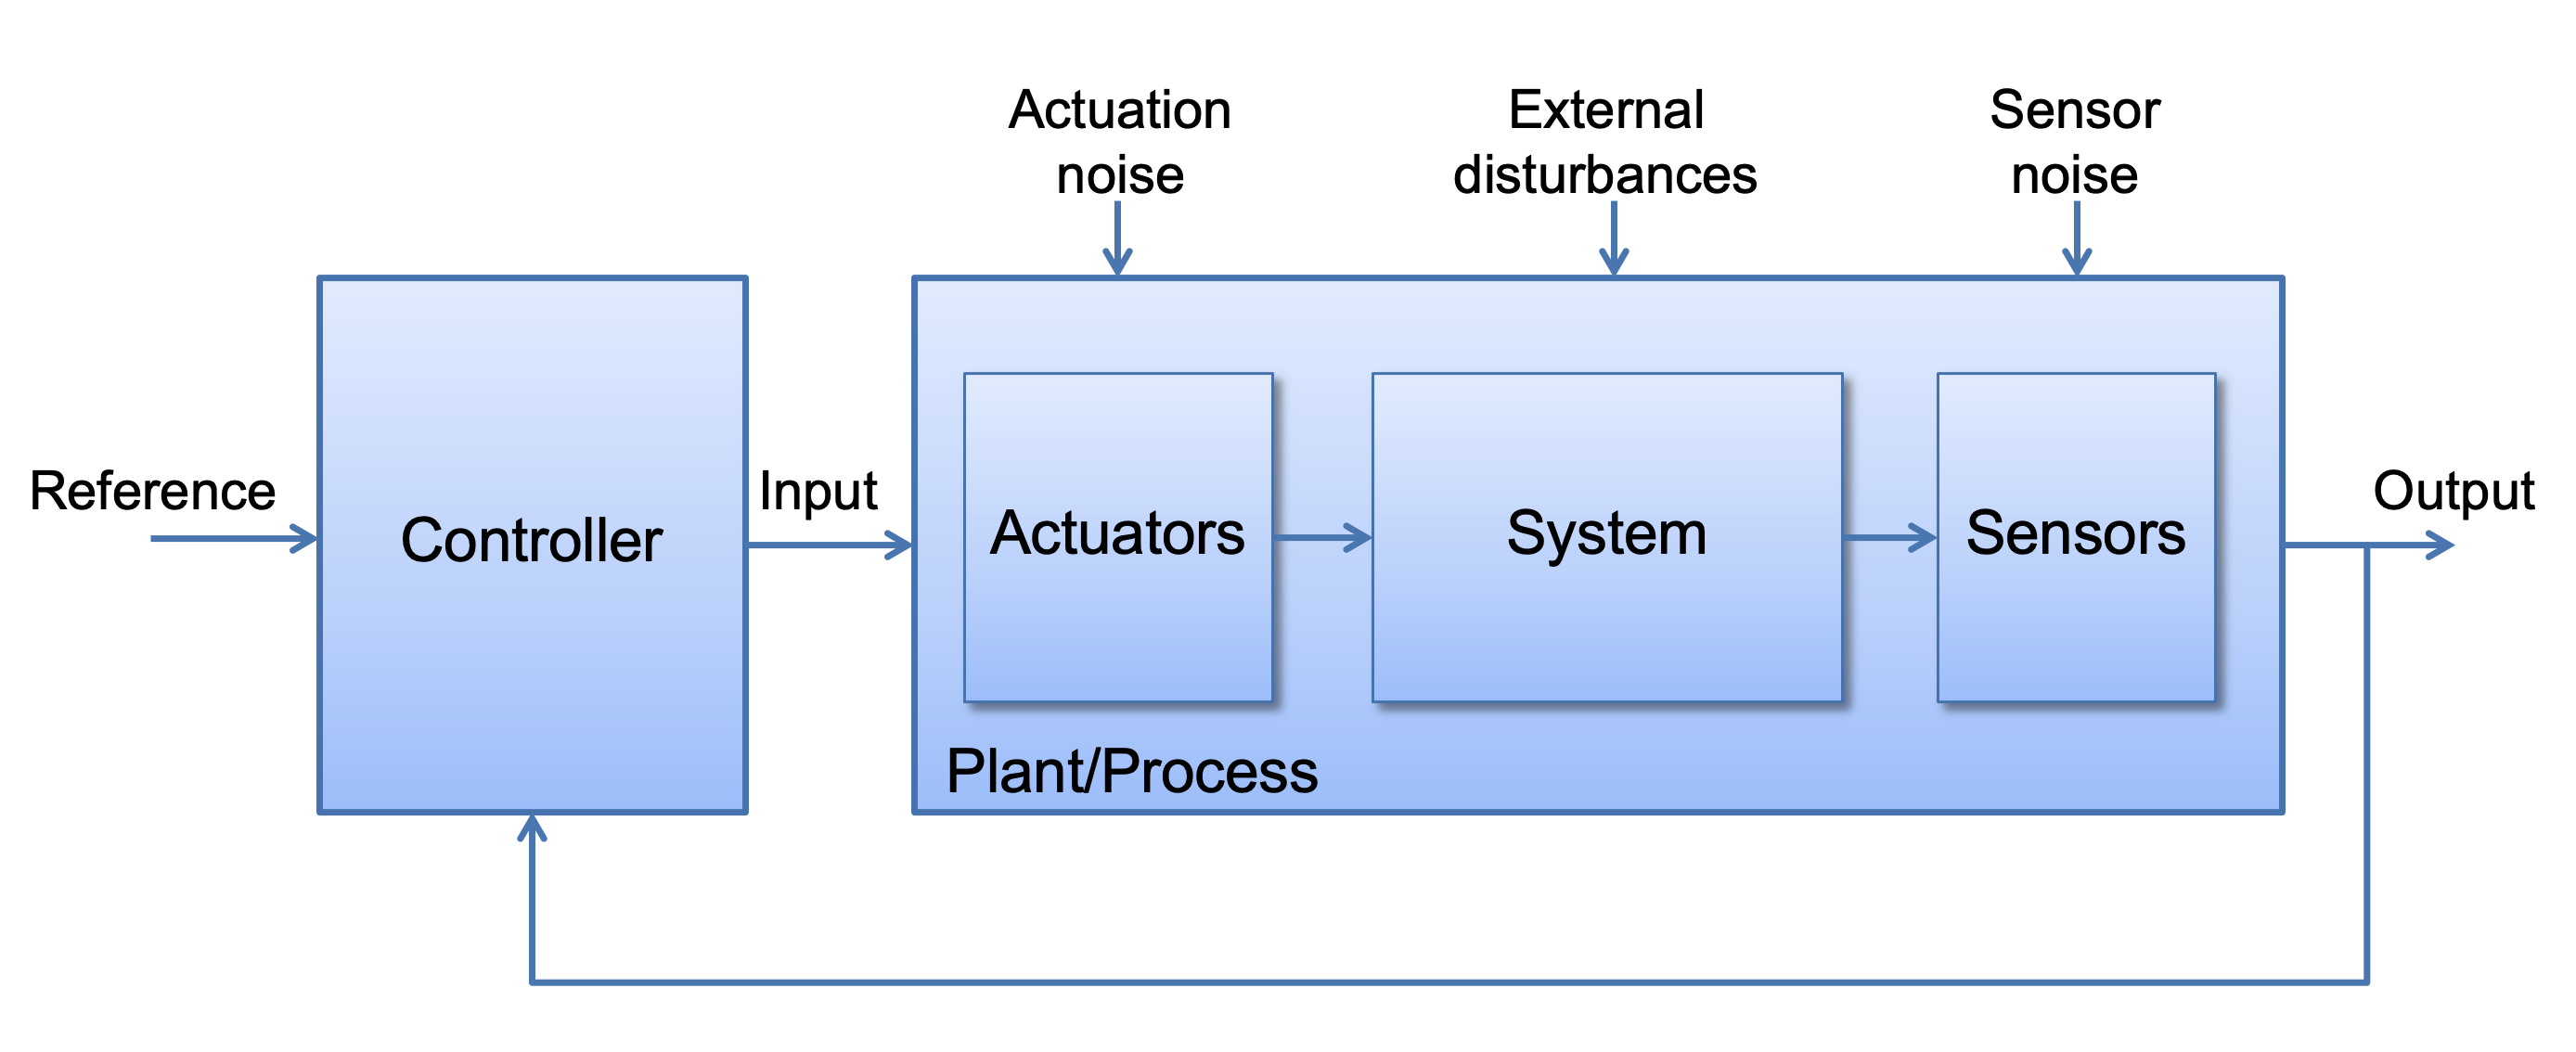


### Control Problem:
 

Design a controller (algorithm) that in **real-time** stabilizes the plant, and make the output signal to track the reference despite external disturbances, noises, and uncertainty.

*In our case we will use Lyapunov theory.*

### Lyapunov's stability theorem
Consider a dynamical system described as

$$
\dot x = f(x)
$$

and $x=0$ be an equilibrium point. \\
Let $V:D \rightarrow \mathbb{R}$ be a continuously differentiable function (the *Lyapunov function*) such that 
* $V(0)=0$, $V(x)>0, \quad \forall x \in D\backslash\left\{0\right\}$
* $\dot V (x) \le 0,\quad \forall x \in D$

Then, $x=0$ is stable. Moreover, if 
$$
  \dot V (x) < 0, \forall x \in D\backslash\left\{0\right\}
$$
then $x=0$ is asymptotically stable.


### How can we use the above to design a simple feedback law?

**Example:** Let my system be described by 
$$
\dot x = x^2 + u
$$
where $x$ is the state and $u$ the input.

Suppose that we would like to design a feedback law for $u$ such that the state will track a given desired reference signal $x_d(t)$.

In other words, we would to have the origen of the tracking error defined as $\tilde x = x-x_d$ of the closed-loop system to be asymptotically stable.  


**Step 1:** Derive the related dynamical system of the tracking error
\begin{align*}
\dot{\tilde x} &= \dot x - \dot x_d \\
&= x^2 + u -\dot x_d
\end{align*} 

**Step 2:** Introduce a control Lyapunov function
$$
V = \frac{1}{2}\tilde x^2
$$

**Step 3:** Compute $\dot V$
\begin{align*}
\dot V &= \tilde x \dot{\tilde x} \\
&= \tilde x(x^2 + u -\dot x_d)
\end{align*} 

**Step 4:** Set a feedback law for $u$ such that $\dot V <0$ 
$$
u = -x^2+\dot x_d - k\tilde x, \quad k>0
$$
Note that with this controller we obtain 
$$
\dot V = -k \tilde x^2
$$
Thus from Lyapunov's theorem one can conclude that the origin of the closed-loop tracking error system is asymptotically stable, which implies that that state $x$ will converge to the desired signal $x_d$.


### It is time to simulate!

Let us confirm the results for the desired reference signal $x_d(t) = \sin(t)$ through simulation by plotting the **time-evolution** of the state $x(t)$, the control signal $u(t)$, and the tracking error $\tilde x(t)$.

We will use the *Euler* discretization to approximate the solution of a continuous time differential equation.
https://en.wikipedia.org/wiki/Euler_method

$$
\dot x \approx \frac{x_{t+1}-x_t}{h}
$$

It turns out that for a step size $h$ sufficiently small, we can obtain a very good approximation. 

In this case our discrete system is given by
$$
x_{t+1} = x_t + (x^2_t + u_t)h, \quad t = 0, 1, 2, \ldots
$$
where $h$ is the *sampling period*, and our controller is
$$
u_t = -x_t^2 + \dot x_{d,t} - k (x_t - x_{d,t}), \quad k>0
$$

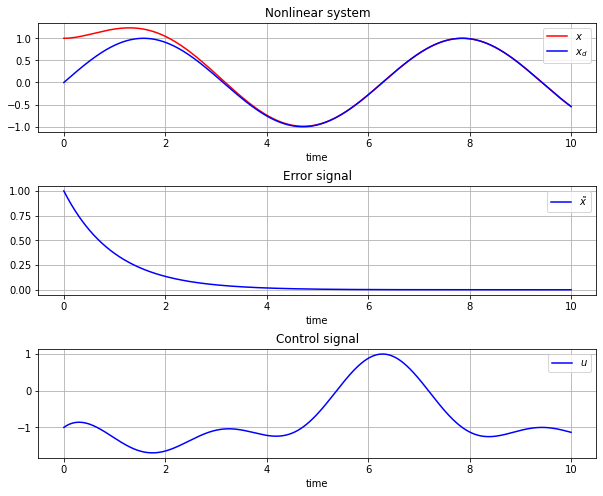

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

# My discrete system
def disc_sys(x,u,h):
  return x+ (x**2 + u)*h


h = 0.001 #Sample time
t_end=10  # final time

#Signals
t_signal = np.arange(0,t_end,h) # time samples

x_signal = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)

xd_signal= np.sin(t_signal)
xd_dot_signal=np.cos(t_signal)

#Initial condition of our system
x_signal[0] = 1

k=1  # parameter of the controller

# Iteration
for t in range(0,t_signal.shape[0]-1):
    u_signal[t] = -x_signal[t]**2 + xd_dot_signal[t] -k*(x_signal[t]-xd_signal[t]) 
    x_signal[t+1] = disc_sys(x_signal[t],u_signal[t],h)

#plot
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)


ax1.plot(t_signal, x_signal, 'r-', label='$x$')
ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.set_title("Nonlinear system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal, x_signal-xd_signal, 'b-', label=r'$\tilde x$')
ax2.set_title("Error signal")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')

ax3.plot(t_signal[0:len(t_signal)-1], u_signal[0:len(t_signal)-1], 'b-', label='$u$')
ax3.set_title("Control signal")
ax3.set_xlabel("time")
ax3.grid()
ax3.legend(loc='best');






## Activity 1

Do the same for the system
$$
\dot x = -\tan(x) + u
$$